# **Setup and Load Data**

# Install dependecies and setup
Tensorflow for pipelining, opencv for cleaning dataset, matplotlib for visualization

In [2]:

%pip install tensorflow tensorflow-gpu opencv-python matplotlib 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Validation

In [3]:
%pip list

Package                      Version
---------------------------- -----------
absl-py                      1.2.0
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
asttokens                    2.0.8
astunparse                   1.6.3
attrs                        22.1.0
backcall                     0.2.0
beautifulsoup4               4.11.1
bleach                       5.0.1
cachetools                   5.2.0
certifi                      2022.6.15
cffi                         1.15.1
charset-normalizer           2.1.1
colorama                     0.4.5
cycler                       0.11.0
debugpy                      1.6.3
decorator                    5.1.1
defusedxml                   0.7.1
entrypoints                  0.4
executing                    1.0.0
fastjsonschema               2.16.1
flatbuffers                  1.12
fonttools                    4.37.1
gast                         0.4.0
google-auth                  2.11.0
google-auth-oauthlib         0.4.6
go

Importing dependecies

In [4]:
import tensorflow as tf
import os 
#navigate through file structures
from tensorflow import keras
from keras import layers

Limiting gpu vrm usage 

In [5]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [6]:
os.chdir('D:\\project')
data_dir = 'trainData'

In [7]:
os.listdir(data_dir)

['banana', 'mold', 'over_ripe', 'ripe', 'rotten', 'unripe']

Sorting, Pipelining and Loading Data

In [8]:
import numpy as np
from matplotlib import pyplot as plt

Building data pipeline

In [9]:
data = tf.keras.utils.image_dataset_from_directory('trainData')

Found 5264 files belonging to 6 classes.


For accessing the pipeline, data visualization, using batchs

In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
batch = data_iterator.next()

In [12]:
# Images represented as numpy arrays
batch

(array([[[[ 26.75    ,  49.75    ,  67.75    ],
          [ 26.75    ,  49.75    ,  67.75    ],
          [ 26.75    ,  49.75    ,  67.75    ],
          ...,
          [ 52.      ,  79.      ,  96.      ],
          [ 53.      ,  80.      ,  97.      ],
          [ 53.25    ,  80.25    ,  97.25    ]],
 
         [[ 27.25    ,  50.25    ,  68.25    ],
          [ 27.25    ,  50.25    ,  68.25    ],
          [ 27.25    ,  50.25    ,  68.25    ],
          ...,
          [ 53.      ,  80.      ,  97.      ],
          [ 52.      ,  79.      ,  96.      ],
          [ 51.      ,  78.      ,  95.      ]],
 
         [[ 28.      ,  51.      ,  69.      ],
          [ 28.      ,  51.      ,  69.      ],
          [ 28.      ,  51.      ,  69.      ],
          ...,
          [ 52.25    ,  79.25    ,  96.25    ],
          [ 52.75    ,  79.75    ,  96.75    ],
          [ 52.75    ,  79.75    ,  96.75    ]],
 
         ...,
 
         [[ 93.0625  , 120.0625  , 149.0625  ],
          [ 92.484

In [13]:
len(batch)
#images, labels

2

In [14]:
#images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [15]:

batch[1]

array([0, 3, 4, 3, 5, 3, 5, 0, 0, 5, 0, 0, 5, 4, 3, 2, 3, 0, 0, 0, 2, 4,
       3, 3, 0, 3, 5, 0, 0, 0, 5, 0])

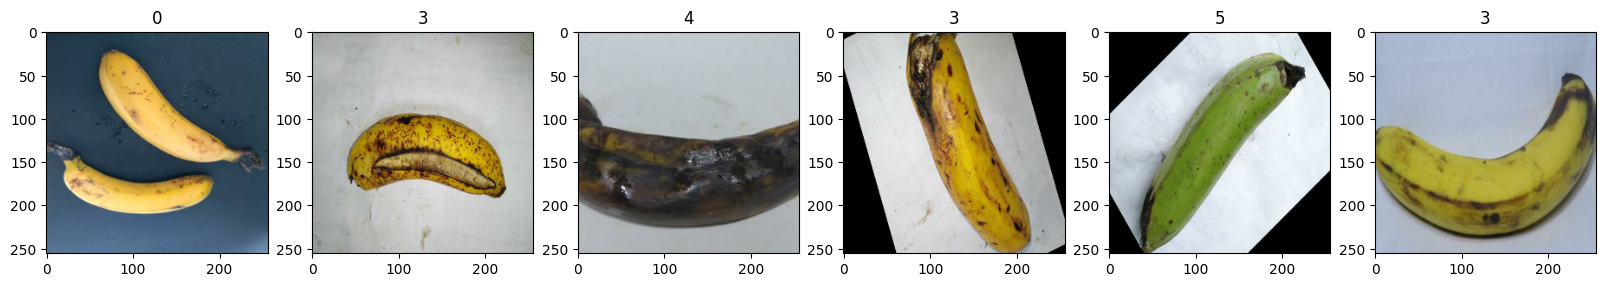

In [16]:
#checking which class is assign to which type of image

fig, ax = plt.subplots(ncols=6, figsize=(20,20))
for idx, img in enumerate(batch[0][:6]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Pre-processing

In [17]:
#lowest value
batch[0].min()

0.0

In [18]:
#highest value
batch[0].max()

255.0

Optimizing by reducing values to btwn 0-
Scaling Data

In [19]:
scaled = batch[0] / 255

In [20]:
scaled.min()

0.0

In [21]:
scaled.max()

1.0

In [22]:
# x = Images, y = target variable
# no transformation on y 
# mapping acrosss elements in the dataset 
data = data.map(lambda x,y: (x/255, y))

In [23]:
scaled_iterator = data.as_numpy_iterator()

In [24]:
batch = scaled_iterator.next()

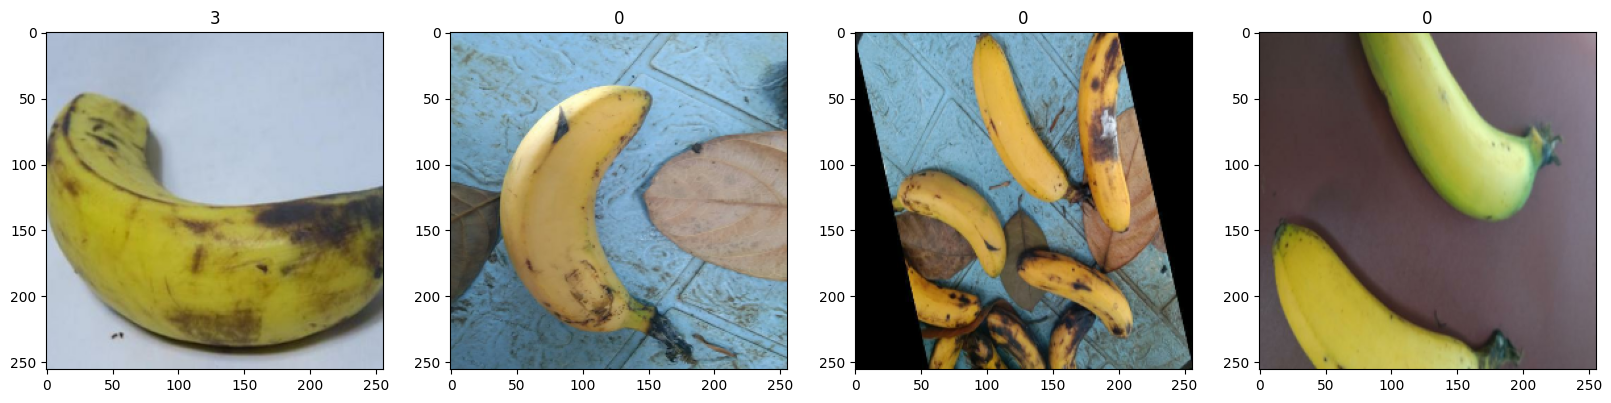

In [25]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

Split Data

In [26]:
len(data)

165

In [27]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)

In [28]:
train_size

115

In [29]:
val_size

34

In [30]:
test_size

16

In [31]:
train_size+val_size+test_size

165

Batch allocation

In [32]:
train = data.take(train_size)
#skiping batches already taken 
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [33]:
len(val)
# train, test too

34

Building Networks; Deep Learning Model

In [34]:
from tensorflow.python.keras.engine.sequential import Sequential
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

In [35]:
model = Sequential()

In [36]:
# Done sequentially
# no. of filters, size of filters(pixels), stride 
# Relu activativation, negative value to zero and positive
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(200,200,3)))
model.add(MaxPooling2D())


model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())


model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [37]:
#Adam's optimizer
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8464)              0